# 박우영 김호준 김현동 백두산

##  Weather Multi Label Classification

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [426]:
weather = pd.read_csv('weather_classification_data.csv')
df = weather.copy()

## 데이터 확인

In [427]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [428]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [429]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [430]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

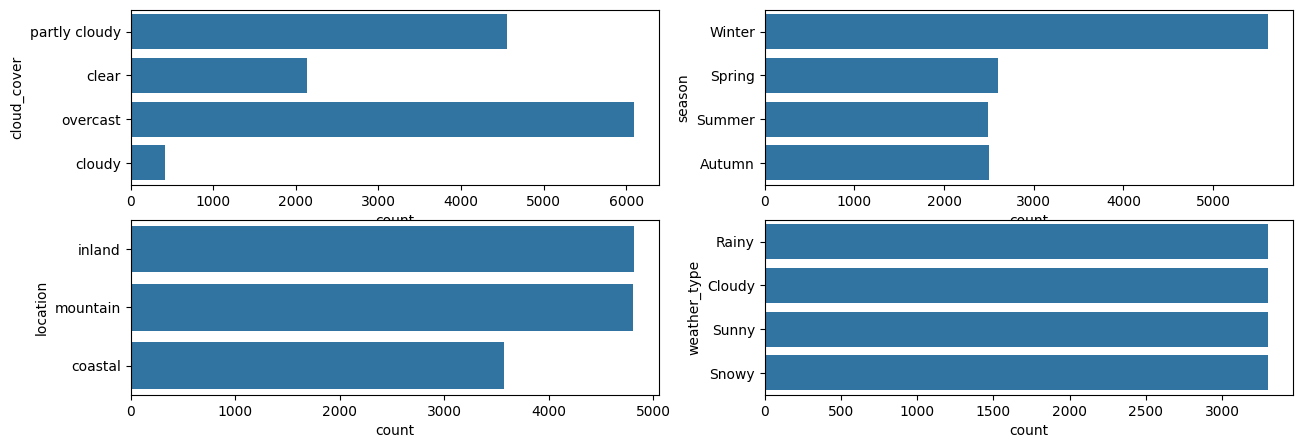

In [431]:

object_coilumns = df.select_dtypes('object').columns

fix, ax = plt.subplots(2, 2, figsize=(15, 5))

for col in object_coilumns:
    sns.countplot(y=col, data=df, ax=ax[object_coilumns.get_loc(col) // 2][object_coilumns.get_loc(col) % 2])

<Axes: >

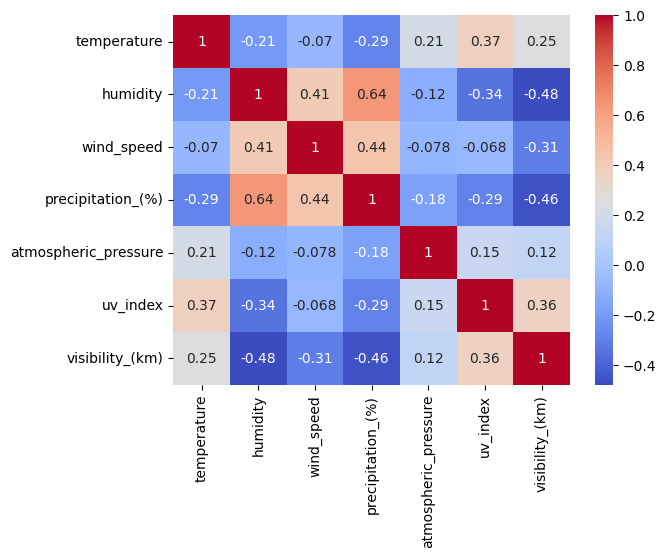

In [432]:
# 상관계수
numeric_columns = df.select_dtypes('number').columns
corr = df[numeric_columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

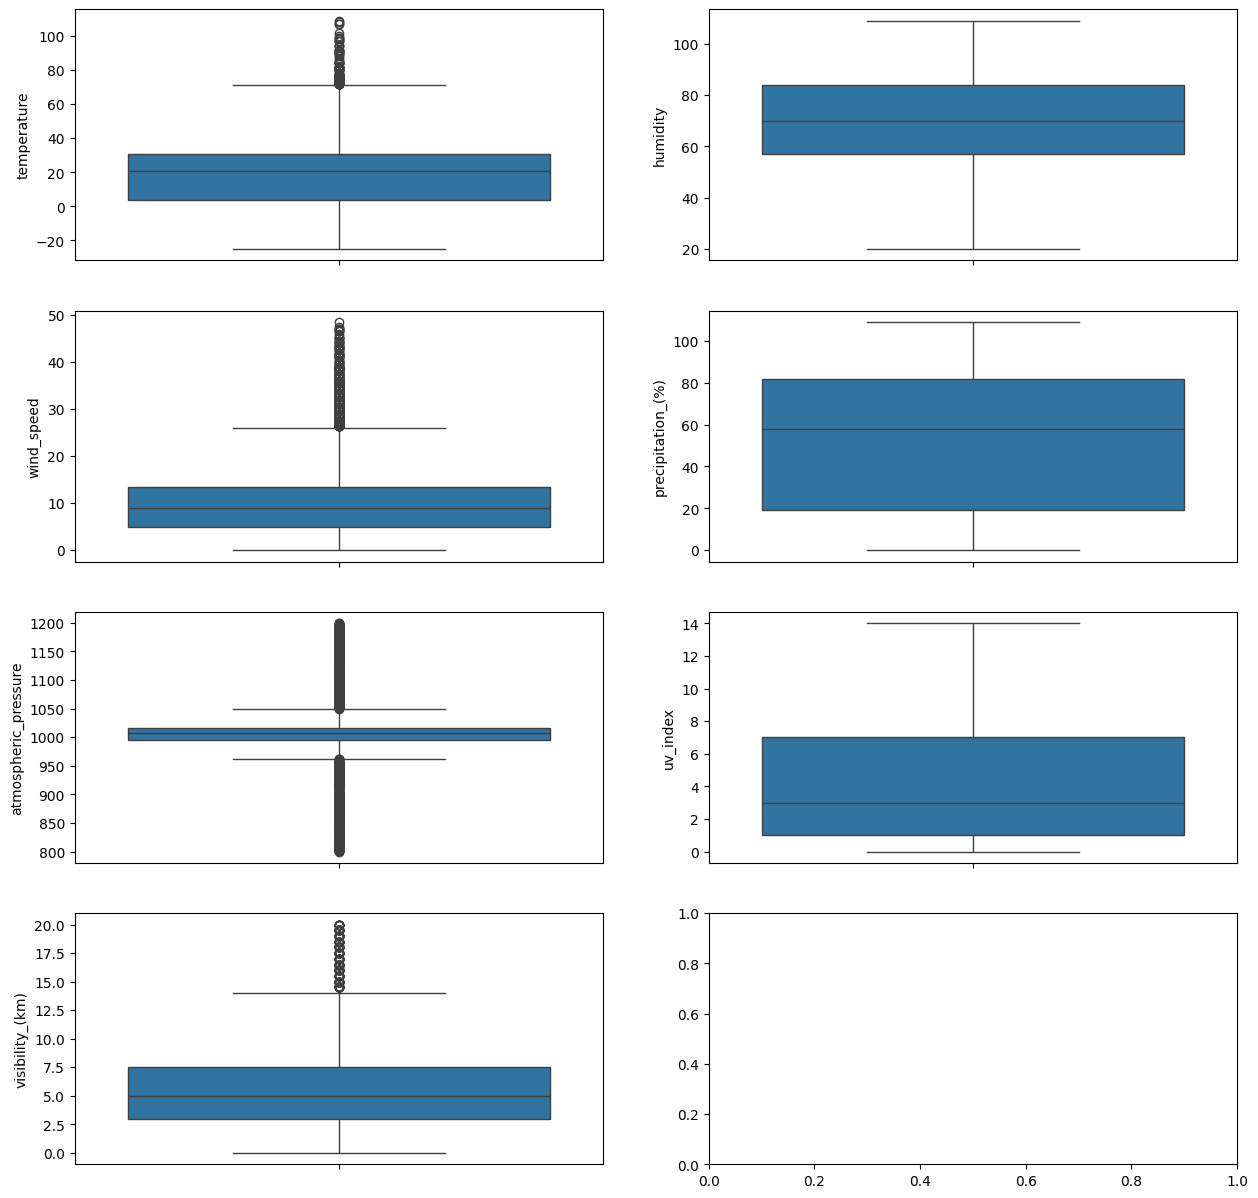

In [433]:
# numeric_columns  의 이상치 확인
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

ax.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=col, data=df, ax=ax[i // 2][i % 2])

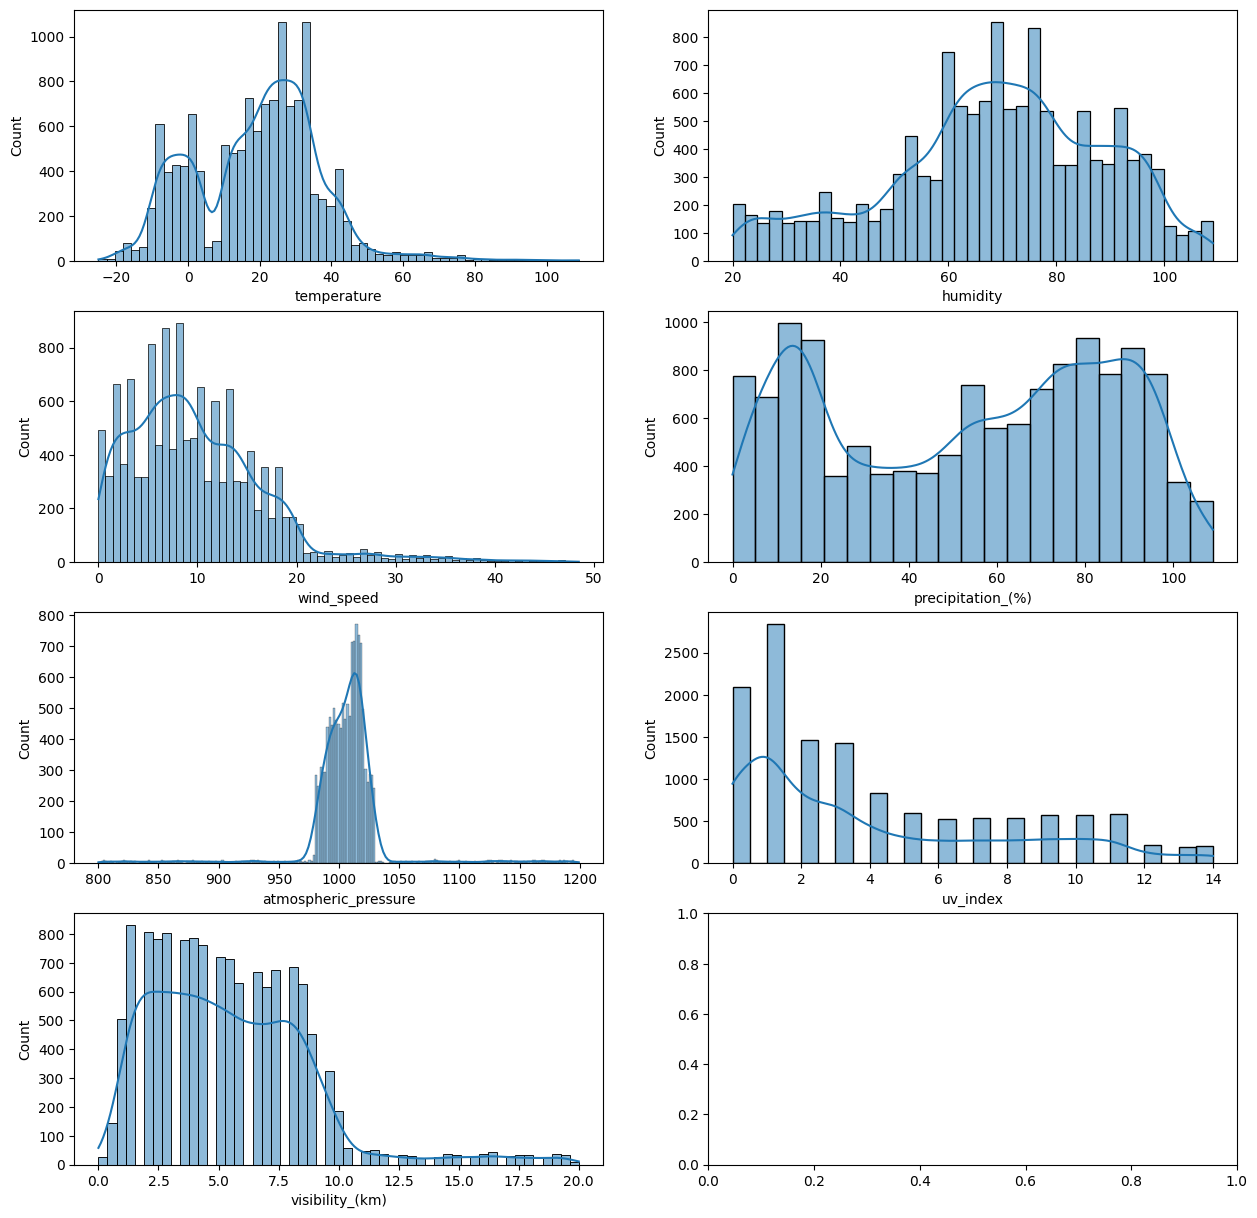

In [434]:
# histogram

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax = ax.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], ax=ax[i], kde=True)

In [435]:
# one-hot encoding

df = pd.get_dummies(df, columns=['cloud_cover', 'season', 'location'])

In [436]:
df.head()

,temperature,humidity,wind_speed,precipitation_(%),atmospheric_pressure,uv_index,visibility_(km),weather_type,cloud_cover_clear,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,season_Autumn,season_Spring,season_Summer,season_Winter,location_coastal,location_inland,location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,False,False,False,True,False,False,False,True,False,True,False
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,False,False,False,True,False,True,False,False,False,True,False
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,True,False,False,False,False,True,False,False,False,False,True
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,True,False,False,False,False,True,False,False,True,False,False
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,False,False,True,False,False,False,False,True,False,False,True


In [437]:
# 상관도가 높은 피쳐들을 제거
# 상관도가 0.4 이상인 피처들
high_corr = corr[abs(corr) > 0.4]
high_corr = high_corr[high_corr < 1].stack().reset_index()
high_corr

,level_0,level_1,0
0,humidity,wind_speed,0.406079
1,humidity,precipitation_(%),0.638631
2,humidity,visibility_(km),-0.479969
3,wind_speed,humidity,0.406079
4,wind_speed,precipitation_(%),0.443770
5,precipitation_(%),humidity,0.638631
6,precipitation_(%),wind_speed,0.443770
7,precipitation_(%),visibility_(km),-0.457444
8,visibility_(km),humidity,-0.479969
9,visibility_(km),precipitation_(%),-0.457444


In [438]:
# precipitation_, visibility_ drop
# df.drop(['precipitation_(%)', 'visibility_(km)'], axis=1, inplace=True)
# 오히려 성능 떨어졌음

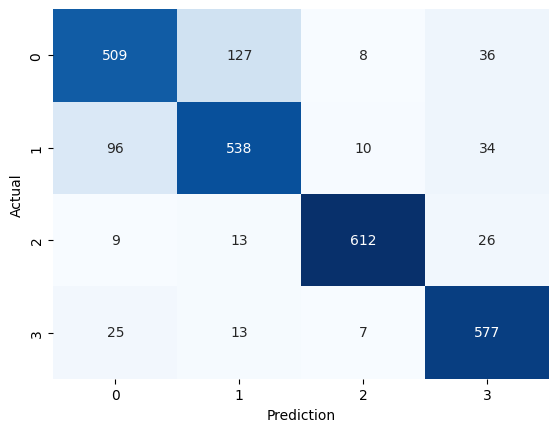

In [439]:
# train, test 데이터 분리
from sklearn.model_selection import train_test_split

X = df.drop('weather_type', axis=1)
y = df['weather_type']

In [440]:
# to_categorical
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [441]:
# train, test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [442]:
# RobustScaler 사용
# 이상치가 많이 존재하는 데이터셋에 적합한 스케일러

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [443]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 모델 설계

In [444]:
import tensorflow as tf
import keras
from keras.models import Sequential

model = Sequential(
    [

        keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(4, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/envs/SKT/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [445]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10560, 18), (2640, 18), (10560, 4), (2640, 4))

In [446]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2,)

Epoch 1/50


1056/1056 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.5754 - loss: 1.0796 - val_accuracy: 0.8859 - val_loss: 0.4229
Epoch 2/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.8829 - loss: 0.3993 - val_accuracy: 0.8958 - val_loss: 0.3276
Epoch 3/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8889 - loss: 0.3215 - val_accuracy: 0.9010 - val_loss: 0.2921
Epoch 4/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8999 - loss: 0.2811 - val_accuracy: 0.8925 - val_loss: 0.2808
Epoch 5/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9010 - loss: 0.2680 - val_accuracy: 0.8996 - val_loss: 0.2608
Epoch 6/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8999 - loss: 0.2520 - val_accuracy: 0.9039 - val_loss: 0.2488
Epoch 7/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9017 - loss: 0.2402 - val_accuracy: 0.9077 - val_loss: 0.2402
Epoch 8/50
1056/1056 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.9042 - loss: 0.23

## 평가

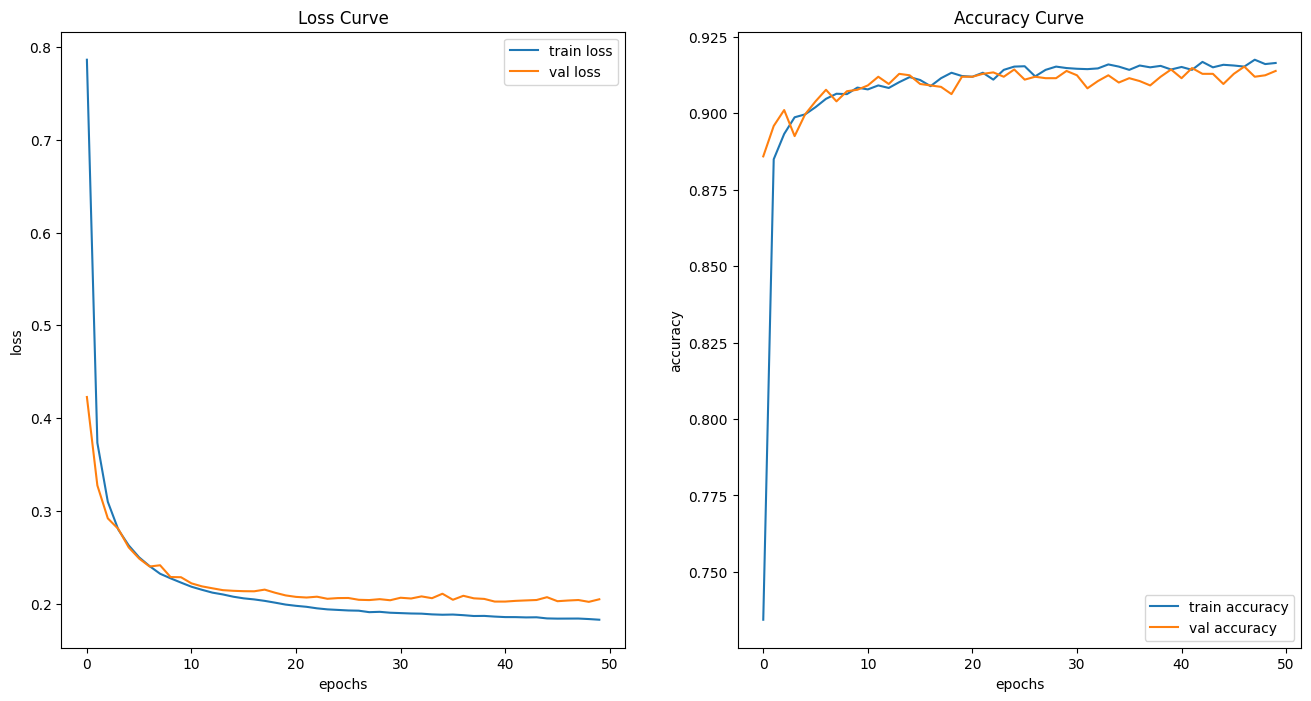

In [447]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [448]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='macro'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
accuracy: 0.9185606060606061
recall: 0.9190901470528637
precision: 0.9212208079761312
f1 : 0.9192341165461451


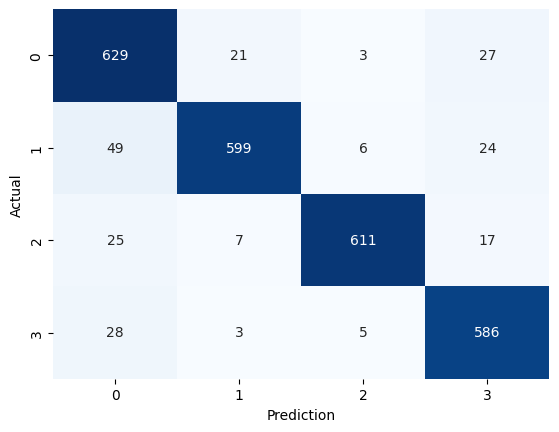

In [449]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

print_metrics(np.argmax(y_test, axis=1), y_pred)